In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Import data
df = pd.read_excel('stock_price_data.xlsx', sheet_name = None)

## Data Cleaning

In [4]:
for i in df:
    print(i, df[i].isna().sum(), sep='\n', end = "\n"+"="*30+"\n" if i != "Summary" else "")

0005.HK
Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64
0027.HK
Date           0
Open         164
High         164
Low          164
Close        164
Adj Close    164
Volume       164
dtype: int64
0101.HK
Date          0
Open         82
High         82
Low          82
Close        82
Adj Close    82
Volume       82
dtype: int64
HSI
Date           0
Open          79
High          79
Low           79
Close         79
Adj Close     79
Volume       461
dtype: int64
DJI
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
SSEC
Date           0
Open         129
High         129
Low          129
Close        129
Adj Close    129
Volume       129
dtype: int64
Summary
Unnamed: 0             0
HSBC (5)               0
Galaxy (027）           0
Hang Lung (101)        0
HSI                    0
DJI (to be updated)    0
SSEC                   0
dtype: int64

In [5]:
for i in df:
    if i != "Summary":
        for j in df[i]:
            j != "Date" and df[i][j].interpolate(method = 'linear', axis = 0, limit = None, inplace = True)  

In [6]:
for i in df:
    print(i, df[i].isna().sum(), sep='\n', end = "\n"+"="*30+"\n" if i != "Summary" else "")

0005.HK
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0027.HK
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0101.HK
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
HSI
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       395
dtype: int64
DJI
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
SSEC
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Summary
Unnamed: 0             0
HSBC (5)               0
Galaxy (027）           0
Hang Lung (101)        0
HSI                    0
DJI (to be updated)    0
SSEC                   0
dtype: int64

## Data Splitting

In [7]:
train_0005 = df["0005.HK"][df["0005.HK"]["Date"] <= "2022-12-31"]
test_0005 = df["0005.HK"][df["0005.HK"]["Date"] >= "2023-01-01"]
train_0027 = df["0027.HK"][df["0027.HK"]["Date"] <= "2022-12-31"]
test_0027 = df["0027.HK"][df["0027.HK"]["Date"] >= "2023-01-01"]
train_0101 = df["0101.HK"][df["0101.HK"]["Date"] <= "2022-12-31"]
test_0101 = df["0101.HK"][df["0101.HK"]["Date"] >= "2023-01-01"]

## Arima Modelling

### Fit model

In [8]:
warnings.filterwarnings('ignore')

In [9]:
model_0005 = sm.tsa.arima.ARIMA(train_0005["Adj Close"], order=(2, 1, 3))
results_0005 = model_0005.fit()

In [10]:
model_0027 = sm.tsa.arima.ARIMA(train_0027["Adj Close"], order=(2, 1, 3))
results_0027 = model_0027.fit()

In [11]:
model_0101 = sm.tsa.arima.ARIMA(train_0101["Adj Close"], order=(1, 1, 1))
results_0101 = model_0101.fit()

In [12]:
print(" "+"-"*46)
print("|{:^13s}|{:^11s}|{:^20s}|".format("Data", "Order", "AIC"))
print("|{:-^13s}|{:-^11s}|{:-^20s}|".format("", "", ""))
print("|{:^13s}|{:^11s}|{:^20.12f}|".format("train_0005", str((2, 1, 3)), results_0005.aic))
print("|{:^13s}|{:^11s}|{:^20.10f}|".format("train_0027", str((2, 1, 3)), results_0027.aic))
print("|{:^13s}|{:^11s}|{:^20.13f}|".format("train_0101", str((1, 1, 1)), results_0101.aic))
print(" "+"-"*46)

 ----------------------------------------------
|    Data     |   Order   |        AIC         |
|-------------|-----------|--------------------|
| train_0005  | (2, 1, 3) | 12828.053033984961 |
| train_0027  | (2, 1, 3) |  13515.1142326683  |
| train_0101  | (1, 1, 1) | 1855.5496039316417 |
 ----------------------------------------------


### Predict

In [13]:
predicted_0005 = results_0005.forecast(steps=len(test_0005), alpha=0.05)
predicted_0027 = results_0027.forecast(steps=len(test_0027), alpha=0.05)
predicted_0101 = results_0101.forecast(steps=len(test_0101), alpha=0.05)

### MAPE

In [14]:
mape_0005 = np.mean(np.abs((test_0005["Adj Close"] - predicted_0005) / test_0005["Adj Close"])) * 100
mape_0027 = np.mean(np.abs((test_0027["Adj Close"] - predicted_0027) / test_0027["Adj Close"])) * 100
mape_0101 = np.mean(np.abs((test_0101["Adj Close"] - predicted_0101) / test_0101["Adj Close"])) * 100

In [15]:
print("""MAPE for 0005 = {:^.3f}%
MAPE for 0027 = {:^.3f}%
MAPE for 0101 = {:^.3f}%""".format(mape_0005, mape_0027, mape_0101))

MAPE for 0005 = 13.201%
MAPE for 0027 = 4.202%
MAPE for 0101 = 3.308%


In [16]:
for i in (results_0005, results_0027, results_0101):
    print(i.params)
    print("="*30) if i != results_0101 else ""

ar.L1     1.121699
ar.L2    -0.990260
ma.L1    -1.131851
ma.L2     1.003756
ma.L3    -0.017741
sigma2    0.543812
dtype: float64
ar.L1     1.577385
ar.L2    -0.952453
ma.L1    -1.549073
ma.L2     0.890426
ma.L3     0.029135
sigma2    0.613406
dtype: float64
ar.L1     0.908693
ma.L1    -0.927229
sigma2    0.080771
dtype: float64


**Equation:**
$$
Y_t = 1.121 + -0.995*(Y_{t-1}) + -1.131*(Y_{t-2} - Y_{t-1}) + 1.009*(e_t + 0.444*e_{t-1} - 0.555*e_{t-2})
$$

**Equation:**
$$
Y_t = 0.695 + 1.577(Y_{t-1}) - 0.952(Y_{t-2} - Y_{t-1}) - 1.549(e_t + 0.444e_{t-1} + 0.029e_{t-2})
$$

**Equation:
$$
Y_t = 10.959 + 0.909(Y_{t-1}) - 0.927(e_t + e_{t-1})
$$

## Forecast

In [17]:
forecast_dates = pd.date_range(start = "2023-3-13", end = "2023-3-17", freq = "B")

In [18]:
forecast_0005 = results_0005.forecast(steps = len(forecast_dates), alpha = 0.05)
forecast_0027 = results_0027.forecast(steps = len(forecast_dates), alpha = 0.05)
forecast_0101 = results_0101.forecast(steps = len(forecast_dates), alpha = 0.05)

In [19]:
df_0005 = pd.DataFrame({"Date": forecast_dates, "Adj Close for 0005": forecast_0005})
df_0027 = pd.DataFrame({"Date": forecast_dates, "Adj Close for 0027": forecast_0027})
df_0101 = pd.DataFrame({"Date": forecast_dates, "Adj Close for 0101": forecast_0101})

In [20]:
for i in (df_0005, df_0027, df_0101):
    i.index = i["Date"]
    i.drop("Date", axis = 1, inplace = True)

In [21]:
forecast_df = pd.concat([df_0005, df_0027, df_0101], axis = 1)

In [22]:
print(forecast_df)

            Adj Close for 0005  Adj Close for 0027  Adj Close for 0101
Date                                                                  
2023-03-13           48.581825           51.491197           15.241939
2023-03-14           48.614862           51.357151           15.225527
2023-03-15           48.617843           51.241601           15.210614
2023-03-16           48.588473           51.187008           15.197062
2023-03-17           48.552576           51.210948           15.184748


In [23]:
forecast_df.reset_index(inplace=True)

In [24]:
results_0005.forecast(steps = len(forecast_dates), alpha = 0.05)

5750    48.581825
5751    48.614862
5752    48.617843
5753    48.588473
5754    48.552576
Name: predicted_mean, dtype: float64

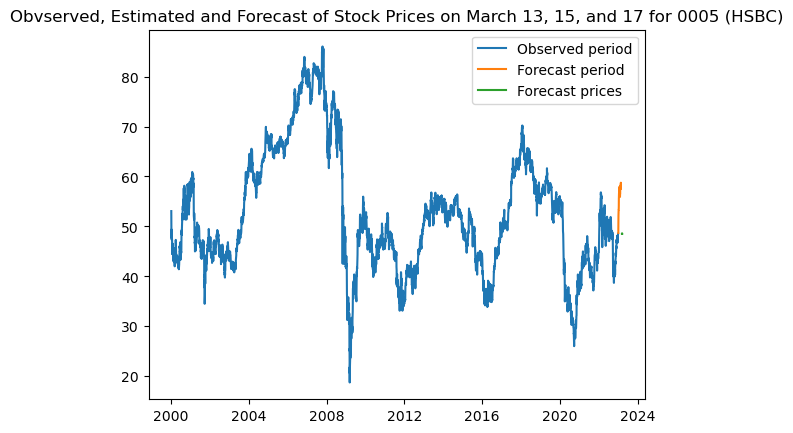

In [25]:
plt.plot(train_0005["Date"], train_0005["Adj Close"], label = "Observed period", linestyle='-')
plt.plot(test_0005["Date"], test_0005["Adj Close"], label = "Forecast period",  linestyle='-')
plt.plot(forecast_dates, forecast_0005, label = "Forecast prices",  linestyle='-')
plt.title("Obvserved, Estimated and Forecast of Stock Prices on March 13, 15, and 17 for 0005 (HSBC)")
plt.xlabel=("Date")
plt.ylabel=("Adj Close")
plt.legend()
plt.show()

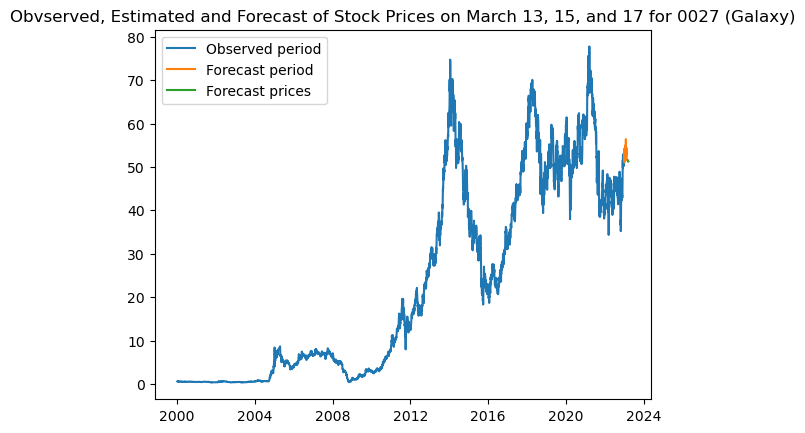

In [26]:
plt.plot(train_0027["Date"], train_0027["Adj Close"], label = "Observed period", linestyle='-')
plt.plot(test_0027["Date"], test_0027["Adj Close"], label = "Forecast period",  linestyle='-')
plt.plot(forecast_dates, forecast_0027, label = "Forecast prices",  linestyle='-')
plt.title("Obvserved, Estimated and Forecast of Stock Prices on March 13, 15, and 17 for 0027 (Galaxy)")
plt.xlabel=("Date")
plt.ylabel=("Adj Close")
plt.legend()
plt.show()

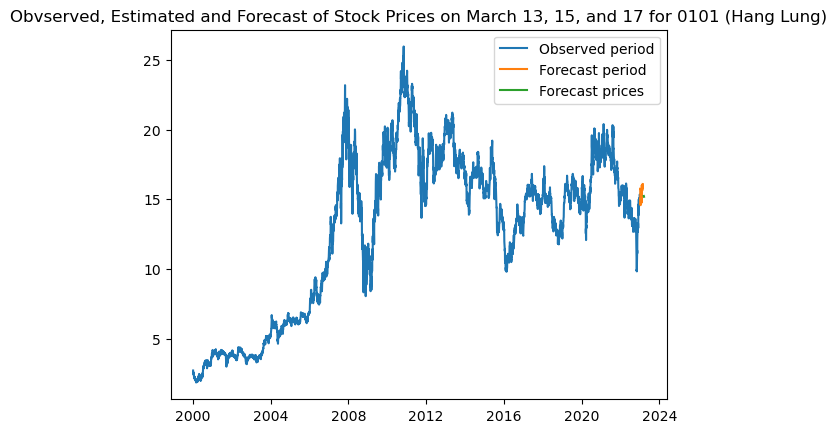

In [27]:
plt.plot(train_0101["Date"], train_0101["Adj Close"], label = "Observed period", linestyle='-')
plt.plot(test_0101["Date"], test_0101["Adj Close"], label = "Forecast period",  linestyle='-')
plt.plot(forecast_dates, forecast_0101, label = "Forecast prices",  linestyle='-')
plt.title("Obvserved, Estimated and Forecast of Stock Prices on March 13, 15, and 17 for 0101 (Hang Lung)")
plt.xlabel=("Date")
plt.ylabel=("Adj Close")
plt.legend()
plt.show()